# CONTENIDO <a id='back'></a>

* [Introducción](#intro)
    * [objetivo](#objetive)
* [Descripción de datos](#description)
    * [Conclusión](#conclusion_1)
* [Tratamiento de valores Ausentes](#null_values)
    * [Columna odometer](#odometer)
    * [Columna model_year](#model_year)
    * [Columna cylinders](#cylinders)
    * [Columna paint_color](#color)
    * [Columna is_4wd](#4wd)
    * [Conclusión](#conclusion_2)
* [Corrección de tipo de datos](#correcion_datos)
* [Enriquecimiento de datos](#enr_data)
* [Comprobación de datos limpios](#comp_data)
    * [Conclusión](#conclusion_3)
* [Estudio de parámetros principales](#estudi_prin)
* [Estudio y tratamiento de valores atípicos](#outlayers)
* [Estudio de parámetros principales sin valores atípicos](#estudi_watip)
* [Periodo de colocación de anuncios](#periodo)
    * [Conclusión](#conclusion_4)
* [Precio promedio por tipo de vehículo](#precio_car)
    * [Conclusión](#conclusion_4)
* [Factores de precio](#factores)
    * [Verificación de factores para vehículos tipo SUV](#SUV)
    * [Verificación de factores para vehículos tipo truck](#truck)
* [Conclusión general](#final_conclution)

## Introducción <a id='intro'></a>

crankshaft list una empresa cuyo giro es la venta de vehículos a tra vez de un sitio web quiere buscar la manera en que diversos facgtores influyen en el precio de un vehículo. Para ello brinda sus datos recopilados a traves de los últimos años.

### Objetivo <a id = 'objetive'></a>

Queremos saber ¿Qué factores impactan más sobre el precio? tomando en consideración factores como millaje, condición del vehículo, años de vida del vehículo, color y tipo de transmisión.

Para ello trataremos nuestros datos en búsqueda de valores dúplicados, corrección de valores ausentes, correción de tipo de datos y la creación de límites para el manejo de valores atípicos para la realización de una tabla nueva sin estos datos, haremos uso de gráficos que nos ayuden a la toma de decisiones.

## Descripción de datos <a id = description></a>

In [1]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
#Guardamos nuestro data en la variable car_data
car_data = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
# Imprimimos nuestras primeras Filas del DataFrame
car_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
# Imprimimos la información de nuestro dataframe
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


En este primer vistazo observamos lo siguiente:
- Nuestro dataframe cuenta con 51525 filas y 12 columnas
- La columna `date_posted`,  `model_year`, `cylinders`, `odometer` y `is_4wd` tiene el tipo de dato erroneo.
- Las columnas `model_year`, `cylinders`, `odometer`, `paint_color` e `is_4wd` tienen valores nulos, siendo la que más tiene nuestra columna `is_4wd`.

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Verifiquemos si contamos con valores duplicados

In [5]:
#Búsqueda de valores duplicados
print(f'Número de valores duplicados: {car_data.duplicated().sum()}')

Número de valores duplicados: 0


### Conclusiones <a id = conclusion_1> </a>

En nuestro primer vistazo a la tabla conramos con un total de 51525 datos y 12 columnas, en las cuales tenemos precencia de datos ausentes en 4 columnas, vamos a ver si hay algún patrón que nos ayude a tomar acciones sobre ellas, tambien contamos con columnas que cuentan con tipos de datos erroneos los cuales corregerimeos. En este caso no contamos con valores duplicados

## Tratamiento de valores ausentes <a id = 'null_values'></a>

### Columna `odometer` <a id = 'odometer'></a>

Observemos una breve descripción de nuestra columna odometer y veamos su distribución en una gráfica de barras respecto a la condición

In [6]:
#verificación general de nuestra columna
car_data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

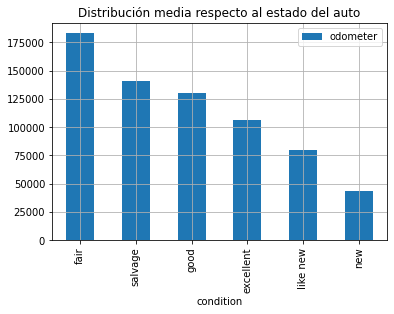

In [7]:
# Distribución media respecto al estado del auto
(car_data
 .pivot_table(index = 'condition', values = 'odometer')
 .sort_values(by='odometer',ascending= False)
 .plot(kind = 'bar', grid = True)
)
plt.title("Distribución media respecto al estado del auto")
plt.show()

De nuestra tabla podemos observar un comportamiento lógico de la cantidad de kilometraje según su estado, a excepción de los autos nuevos que tienen valores altos.Veamos ahora la distribución respecto a las medias

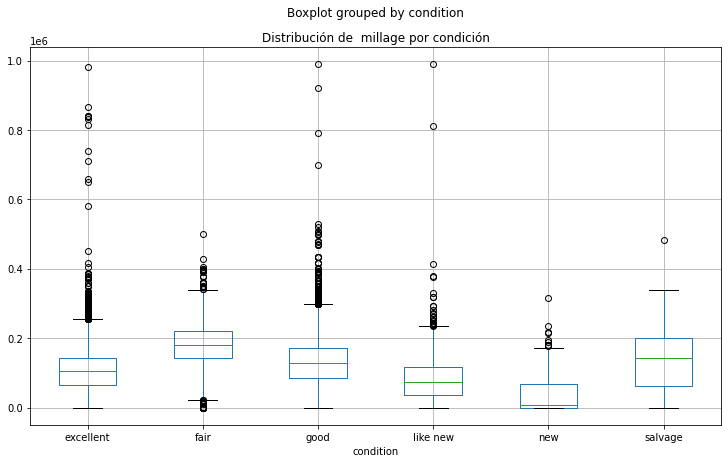

In [8]:
#Imprimamos un diagrama de cajas para ver sus medianas y si cuenta con valores atípicos
car_data.boxplot(column = 'odometer', by='condition', figsize=(12,7))
plt.title("Distribución de  millage por condición")
plt.show()

En nuestra gráfica observamos que tenemos muchos valores atípicos por lo que reemplazaremos nuestros valores nulos de nuestra columna odometer por la medianas acontinuación agruparemos nuestros datos por condición y sacaremos los valores medianos de nuestro millaje, y con estos valores llenaremoS nuestros valores nulos

In [9]:
#Agrupación por condición para buscar valroes medianos de millaje
median_odometer_by_condition= car_data.groupby('condition')['odometer'].transform('median')

#imprimimos nuestro slice generado
print(median_odometer_by_condition)


0        129000.0
1        129000.0
2         72982.5
3        181613.0
4        104230.0
           ...   
51520     72982.5
51521    142673.5
51522    104230.0
51523    129000.0
51524    129000.0
Name: odometer, Length: 51525, dtype: float64


In [10]:
#Rellenamos nuestros valores nulos con las medias calculadas

car_data['odometer'] = car_data['odometer'].fillna(median_odometer_by_condition)

#Verificamos números de valores nulos en la columna "odometer"
print(f'Número de valores núlos: {car_data["odometer"].isna().sum()}')

#imprimimos algunas filas para verificar
car_data.head()



Número de valores núlos: 0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Columna `model_year` <a id= 'model_year'></a>

Veamos de nuestro nuestro valor minimo y máximo para determinar nuestro rango de años 

In [11]:
# Verificación de valores mínimos y máximos
print(car_data['model_year'].agg(['min','max']))

# cantidad de valroes únicos
print("**********************************")
print(f'cantidad de valores únicos: {car_data["model_year"].nunique()}')

min    1908.0
max    2019.0
Name: model_year, dtype: float64
**********************************
cantidad de valores únicos: 68


El auto más viejo corresponde al año 1908 y el más nuevo al año 2019, tenemos 68 valores unicos por lo que no tenemos valores por cada año desde 1908

In [13]:
#Veamos la proporcion de nuestros valores ausentes respecto a la tabla
pivot_table = car_data.pivot_table(index= 'model',values = 'model_year', aggfunc= ['mean','median','count'])

#Observemos nuestros datos
pivot_table.head()

,mean,median,count
,model_year,model_year,model_year
model,,,
acura tl,2007.517857,2007.0,224
bmw x5,2008.991870,2010.0,246
buick enclave,2012.194553,2012.0,257
cadillac escalade,2008.508475,2009.0,295
chevrolet camaro,2008.397959,2013.0,392


Tomaremos esta tabla utilizando nuestra mediana para rellenar nuestros valores ausentes, podemos observar que neustra media y mediana de los modelos son cercanas ademas de que se cuenta con un número suficiente de muestras en la mayoría de los casos

In [333]:
#Definimos una función para llenar valores nulos
def fill_nan(data):
    
    row_data = data['model']
    index = pivot_table.index # Obtenemos nuestros indices para comparar nuestra pivot con nuestro dataframe
    
    if row_data in index:
        return pivot_table.iloc[pivot_table.index.get_loc(row_data),1] #Retornamos nuestros valores de mediana por el modelo


In [334]:
#Aplicación de la función en nuestra tabla
car_data.loc[car_data['model_year'].isna(), 'model_year'] = car_data[car_data['model_year'].isna()].apply(fill_nan, axis = 1)

#verificación de valores nulos
print(f'Número de valores núlos: {car_data["model_year"].isna().sum()}')

#imprimimos algunas filas para verificar
car_data.head()

Número de valores núlos: 0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Columna `cylinders` <a id = 'cylinders'></a>

Aplicaremos la misma estrategía que en nuestra columna `model_year` y aprovecharemos la función ya creada

In [14]:
#Veamos la proporcion de nuestros valores ausentes respecto a la tabla
pivot_table = car_data.pivot_table(index= 'model',values = 'cylinders', aggfunc= ['mean','median','count'])

#Observemos nuestros datos
pivot_table.head()

,mean,median,count
,cylinders,cylinders,cylinders
model,,,
acura tl,5.971564,6.0,211
bmw x5,6.406375,6.0,251
buick enclave,6.000000,6.0,247
cadillac escalade,7.986395,8.0,294
chevrolet camaro,6.887097,6.0,372


In [ ]:
#Aplicación de la función en nuestra tabla
car_data.loc[car_data['cylinders'].isna(), 'cylinders'] = car_data[car_data['cylinders'].isna()].apply(fill_nan, axis = 1)

#verificación de valores nulos
print(f'Número de valores núlos: {car_data["cylinders"].isna().sum()}')

#imprimimos algunas filas para verificar
car_data.head(10)

Podemos observar que los valores nulos han desaprecido, pero se observa dentro de nuestros primeros 10 datos un valor atípico para la honda pilot la cual trataremos después

### Columna `paint_color` <a id = 'color'></a>

Nuestra columna `paint_color` es una variable cualitativa por lo que no podemos obtener su media o mediana, pero para este caso agruparemos nuestros datos por modelo y buscaremos las modas de cada modelo para cambiar nuestros valores nulos

In [337]:
#Guardamos en una variable todas nuestras modas respecto al modelo
pivot_table = car_data.groupby('model')['paint_color'].describe(include = 'object')
pivot_table = pivot_table[['count','top']]

pivot_table

,count,top
model,,
acura tl,188,grey
bmw x5,209,black
buick enclave,229,white
cadillac escalade,258,black
chevrolet camaro,342,red
...,...,...
toyota sienna,264,silver
toyota tacoma,681,white
toyota tundra,492,white


In [338]:
#Aplicación de la función en nuestra tabla
car_data.loc[car_data['paint_color'].isna(), 'paint_color'] = car_data[car_data['paint_color'].isna()].apply(fill_nan, axis = 1)

#verificación de valores nulosa
print(f'Número de valores núlos: {car_data["paint_color"].isna().sum()}')

#imprimimos algunas filas para verificar
car_data.head(10)

Número de valores núlos: 0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,white,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,silver,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Columna `is_4wd` <a id= 4wd></a>

En la descripción de nuestra columna `is_4wd` vemos que sus valores estan entre 0 y 1 por lo que a los valores ausentes los sustituiremos por 0

In [339]:
#Cambiamos nuestros valores ausentes por 0 (False)
car_data['is_4wd'] = car_data['is_4wd'].where(car_data['is_4wd'] == 1 , 0)

# Verificamos si los valores nulos ya no existen
print(f'Valores ausentes: {car_data["is_4wd"].isna().sum()}')

#Imprimimos nuestra columna para corroborar
car_data.head()

Valores ausentes: 0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


### Conclusión <a id = 'conclusion_2'></a>
Hemos corregido nuestros problemas de valores nulos en la mayoria utilizamos las medianas por que hay muchos valores atípicos en nuestros datos

## Correción de tipos de datos <a id= 'correcion_datos'></a>

Nuestras columnas con tipo de datos erroneos son:
- `model_year` la cambiaremos al tipo de dato **bool**
- `odometer` la cambiaremos al tipo de dato **int**
- `is_4wd` la cambiaremos al tipo de dato **int**
- `date_posted` la cambiaremos al tipo de dato **datetime**

In [340]:
#convirtiendo columna "is_4wd a Bool"
car_data['is_4wd']=car_data['is_4wd'].astype('bool')

#Verificamos si se realizó el cambio
print(car_data['is_4wd'].dtype)

bool


In [341]:
#convirtiendo columna "model_year a int"

car_data['model_year']=car_data['model_year'].astype('int16')

#imprimiros para verificar
print(car_data['model_year'].dtype)

int16


In [342]:
#convirtiendo columna "odometer a int"

car_data['odometer']=car_data['odometer'].astype('int32')

#imprimiros para verificar
print(car_data['odometer'].dtype)

int32


In [343]:
#cambiar el tipo de la calumna date_posted a datetime
car_data['date_posted'] = pd.to_datetime(car_data['date_posted'], format ='%Y-%m-%d') 

#imprimiros para verificar
print(car_data['date_posted'].dtype)

datetime64[ns]


 ## Enriquecimiento de datos <a id ='enr_data'></a>

Para tener una mejor calidad en nuestros datos haremos columnas con los valores de
* dia
* año
* mes
* años del vehiculo
* millaje promedio

De igual forma sustituiremos los valores de nuestra columna `condition` por un identificador numérico

In [344]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

#Columna 
car_data['day_posted'] = car_data['date_posted'].dt.day
car_data['month_posted'] = car_data['date_posted'].dt.month
car_data['year_posted'] = car_data['date_posted'].dt.year

#Observemos nuevas columnas en la tabla
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,black,True,2018-06-23,19,23,6,2018
1,25500,2011,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,181613,automatic,pickup,white,False,2019-03-22,9,22,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,4,2019


In [345]:
# Años del vehículo publicado
car_data['car_years'] = car_data['year_posted'] - car_data['model_year'] 
#Veamos resultados

car_data.head() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_years
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,black,True,2018-06-23,19,23,6,2018,7
1,25500,2011,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6
3,1500,2003,ford f-150,fair,8.0,gas,181613,automatic,pickup,white,False,2019-03-22,9,22,3,2019,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2


In [346]:
#Verifiquemos nuetros datos
car_data['car_years'].agg(['min','max'])

min      0
max    110
Name: car_years, dtype: int64

Tenemos valores de año 0 estó nas dará un error en los resultados vamos a cambiar estos valores para que la división se haga por uno y asi no alterar los millajes de los autos con 0 años, para no afecrae nuestros datos utilizaremos una variable temporal para guardar nuestro calumna car_years y asignarle el valor de 1 año donde sea cero

In [347]:
#Cambio de año cero por 1
divisor_car_years = car_data['car_years']
divisor_car_years = divisor_car_years.where(divisor_car_years > 0 , 1)

# Agrega el millaje promedio del vehículo por año
car_data['mill_year'] = car_data['odometer']/divisor_car_years

# #Veamos resultados
car_data.head(20)    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_years,mill_year
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,black,True,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,good,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,181613,automatic,pickup,white,False,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2,40451.500000
5,14990,2014,chrysler 300,excellent,6.0,gas,57954,automatic,sedan,black,True,2018-06-20,15,20,6,2018,4,14488.500000
6,12990,2015,toyota camry,excellent,4.0,gas,79212,automatic,sedan,white,False,2018-12-27,73,27,12,2018,3,26404.000000
7,15990,2013,honda pilot,excellent,6.0,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,1,2019,6,18245.500000
8,11500,2012,kia sorento,excellent,4.0,gas,104174,automatic,SUV,silver,True,2018-07-16,19,16,7,2018,6,17362.333333
9,9200,2008,honda pilot,excellent,6.0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,15,2,2019,11,13381.000000


<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Genial, buena correccion.
</div>

In [348]:
# Remplacemos nuestra columna condition por datos numéricos, primero definamos la función para hacer el cambio

def condition_numeric(data):
    
    row_condition = data['condition']
    
    if row_condition == 'new':
        return 5
    elif row_condition == 'like new':
        return 4
    elif row_condition == 'excellent':
        return 3
    elif row_condition == 'good':
        return 2
    elif row_condition == 'fair':
        return 1
    elif row_condition == 'salvage':
        return 0


In [349]:
#Aplicacion de función
car_data['condition'] = car_data.apply(condition_numeric , axis = 1)

In [350]:
# #verificación de columnca
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_years,mill_year
0,9400,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,black,True,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,181613,automatic,pickup,white,False,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2,40451.500000


## Comprobación de datos limpios <a id = 'comp_data'></a>

In [351]:
# Informción general de los datos
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int16         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  year_posted   51525 non-null  int64 

In [352]:
# Visualización breve de los datos
car_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_years,mill_year
0,9400,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,black,True,2018-06-23,19,23,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,181613,automatic,pickup,white,False,2019-03-22,9,22,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2,40451.500000


### Conclusión <a id='conclusion_3'></a>

Nuestros datos ya no cuentan con valores nulos, hemos agregado 5 columnas que nos sirvieron y serviran para nuestro analisis y tambien cambiamos a los tipos de datos adecuados.

## Estudio de parámetros principales <a id= estudi_prin></a>

Los parámetros a estudiar son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [353]:
#Realizamos una función para mostrar los histogramas
def plot_hist(data,column,title, size = (12,9)):

    data[column].hist(bins = 30, figsize = size)
    
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frecuency")
    plt.show()

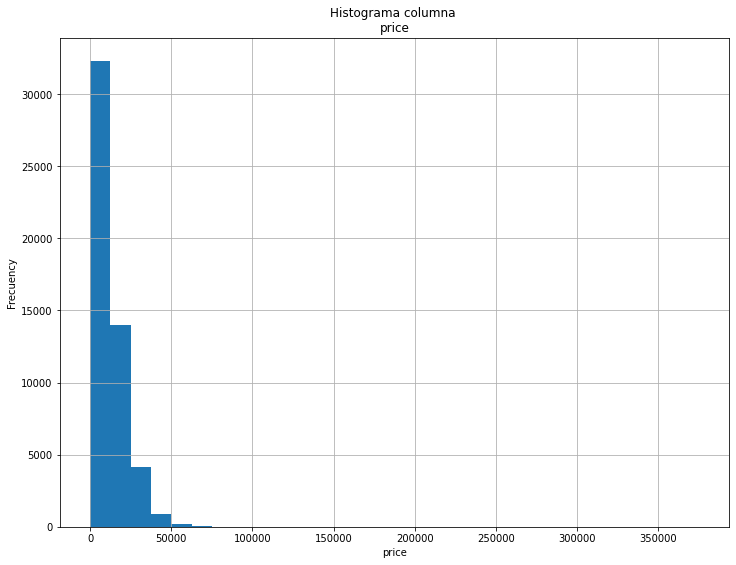

In [354]:
#Histograma de precio
plot_hist(car_data,'price','Histograma columna \nprice')

Observamos que nuestra frecuencia va disminuyendo conforme se aumenta los precios, tenemos un pico muy grande entre los precios aproximados de 0 a 8000 y de ahí va disminuyendo considerablemente las frecuencias hasta el punto que despues de los 50,000 tenemos muy poquitos. Otro punto es que tenemos un valor muy alejado de los demás que puede estar arriba de los $300,000

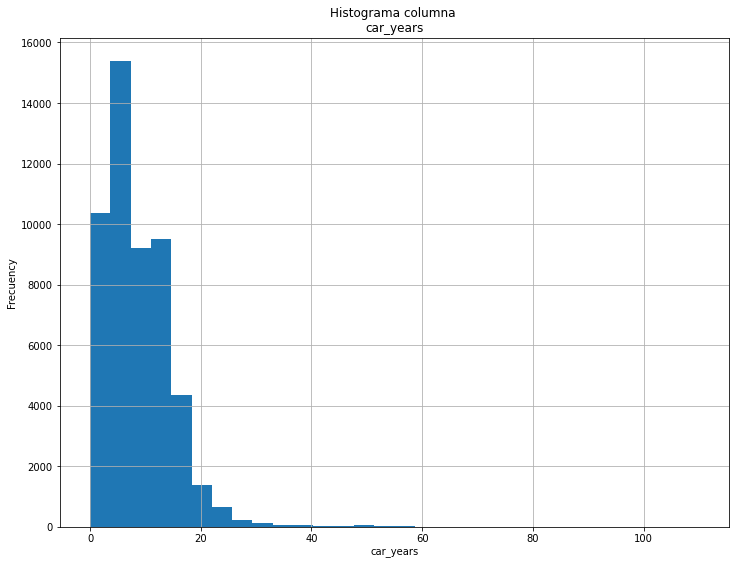

In [355]:
#Histograma de años del vehículo
plot_hist(car_data,'car_years','Histograma columna \ncar_years')


Observamos que tenemos una mayor frecuencia en donde los autos están entre 5 a 10 años aproximadamente, después tenemos una tendencia de bajado en general teniendo muy pocos valores después de los 30 años, aunque tenemos algún auto mayor a los 80 años

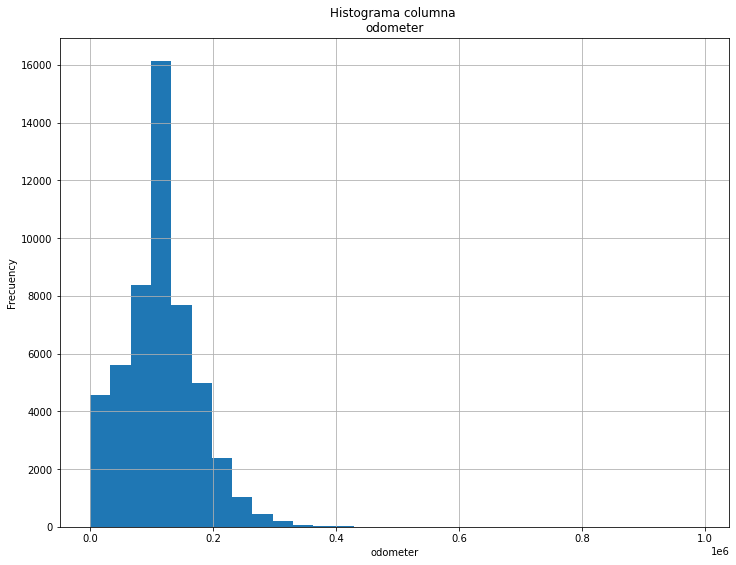

In [356]:
#Histograma de años del millaje
plot_hist(car_data,'odometer','Histograma columna \nodometer')


Aqui observamos una división hacia la izquierda en aumento hasta el pico y después de el vemos que las frecuencias van disminuyendo, algo interesante es que hay algún o algunos valores mayores  a las 800,000 millas que es el equivalente a más de 1,287,475 kilómetros lo cual es un valor muy anormal, además que nuestros valores disminuyen en frecuencia significativamente despues de los 250,000 millas

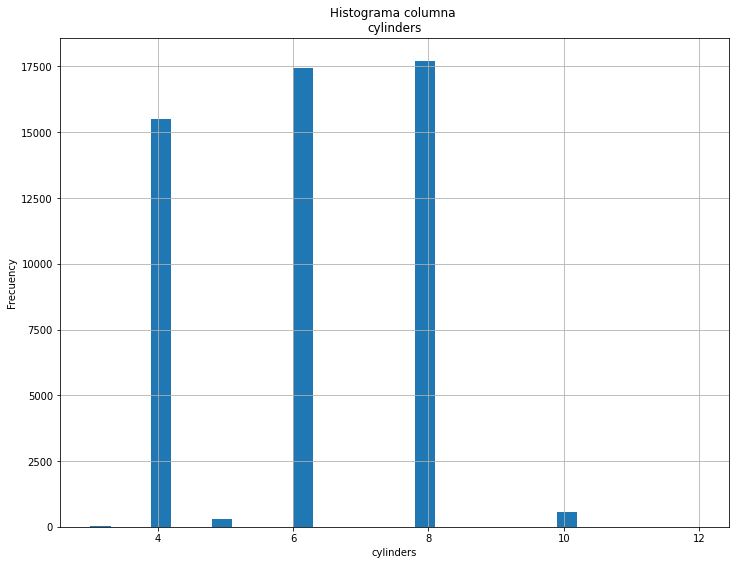

In [357]:
#Histograma de años del cylinders
plot_hist(car_data,'cylinders','Histograma columna \ncylinders')


En este diagrama no tenemos rangos por que son valores discretos así que este se puede ver como un diagrama de barras, aquí observamos que la mayoría de nuestros vehículos enlistados son de 8 cilindros seguido de 6 y 4.

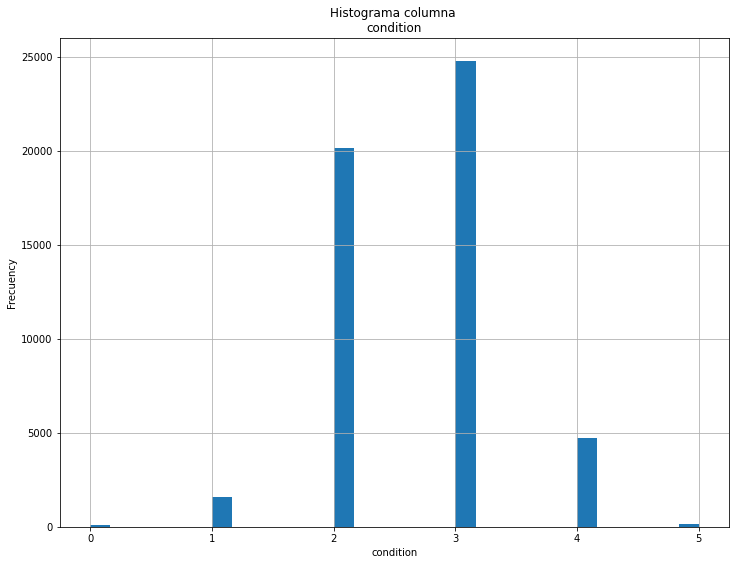

In [358]:
#Histograma de condición del vehículo
plot_hist(car_data,'condition','Histograma columna \ncondition')

Tenemos un caso similar al anterior parametro estudiado, aquí notamos que la mayoria de los valores enlistados son aquellos que están en una condición excelente, seguido por los que estan buenos.

## Estudio y tratamiento de valores atípicos<a id ='outlayers'></a>


Contamos con dos columnas con valores atípicos la columna odometer y price
determinemos nuestros limites inferiores y superiores (nuestros bigotes)

In [359]:
# Función para determinar nuestros valores atípicos
# limit_atipical(column,sup_inf)
#column columna a tratar del data frame
#sup_inf default 0 
            #0: devuelve limite inferior y superior (default)
            #1: devuelve limite superior
            #2: devulve limite inferior
            
def limit_atipical(column, sup_inf = 0):
    
    q1,q3 = np.percentile(car_data[column],[25,75])
    IQR = q3 - q1
    
    print(f'Valores q1= {q1},q3 = {q3},IQR= {IQR}:')
    print('***************************')
    
    if sup_inf == 0:
        inf = q1 - 1.5*IQR
        sup = q3 + 1.5*IQR
        return inf, sup
    elif sup_inf == 1:
        return q3 + 1.5*IQR
    elif sup_inf == 2:
        return q1 - 1.5*IQR
        



In [360]:
# Obtención de límites inferior de nuestras columnas seleccionadas
linf_price = limit_atipical('price', 2)
linf_odometer = limit_atipical('odometer', 2)

print('Limite inferior price:' , linf_price)
print('Limite inferior odometer:' , linf_odometer)

Valores q1= 5000.0,q3 = 16839.0,IQR= 11839.0:
***************************
Valores q1= 75668.0,q3 = 147821.0,IQR= 72153.0:
***************************
Limite inferior price: -12758.5
Limite inferior odometer: -32561.5


In [361]:
# Obtención de límites superiores de nuestras columnas seleccionadas
lsup_price = limit_atipical('price', 1)
lsup_odometer = limit_atipical('odometer', 1)

print('Limite superior price:' , lsup_price)
print('Limite superior odometer:' , lsup_odometer)


Valores q1= 5000.0,q3 = 16839.0,IQR= 11839.0:
***************************
Valores q1= 75668.0,q3 = 147821.0,IQR= 72153.0:
***************************
Limite superior price: 34597.5
Limite superior odometer: 256050.5


Observaremos si nuestros valores teóricos coinciden con nuestros datos graficados en un diagrama de cajas

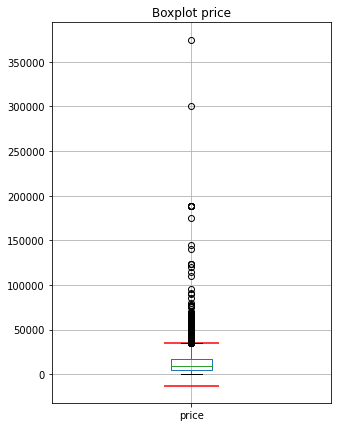

In [362]:
#boxplot de precio
car_data.boxplot(column = 'price',figsize=(5,7))
plt.hlines(y=(lsup_price,linf_price), xmin = .9, xmax = 1.1, color='red')
plt.title("Boxplot price")
plt.show()

De esta tabla podemos observar que nuestro límite inferior teórico no coincide con nuestra caja por que nuestros datos no llegan más abajo de 0, por otro lado nuestra límite superior pareciera estar iguales, tambíen podemos observar como en nuestro histograma de la columna `price` los datos nuestros datos están sesgados hacia la izquierda, vemos una concentración grande de valores atípicos entre $50,000 y  $100,000 estos valores aún suenan razonables.
Por otro lado vemos valores cercanos a 0, así que vamos a eliminar valores por debajo de los $3,000 que suenan precios más razonavbles

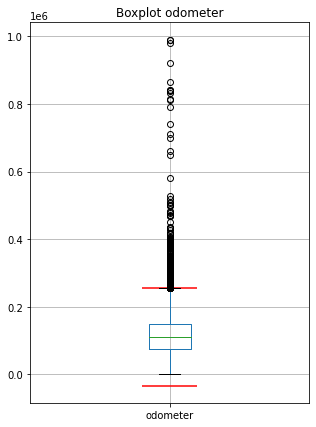

In [363]:
#boxplot de odometer
car_data.boxplot(column = 'odometer',figsize=(5,7))
plt.hlines(y=(lsup_odometer,linf_odometer), xmin = .9, xmax = 1.1, color='red')
plt.title("Boxplot odometer")
plt.show()

Para nuestra tabla podemos observar que nuestro limite inferior tenemos la misma situación que en la columna price, vemos una distribción un poco más centrada dentro de nuetra caja más sin embargo tenemos varios valores atípicos, en esta ocasión utilizaremos nuestros limite superior como tope. 

## Estudio de parámetros principales sin valores atípicos <a id = 'estudio_watip'></a>

En base a los histogramas vistos con anterioridad, la selección de aquellos que decidimos tenían valores atípicos y el calculo de nuestros límites vamos a hacer una nueva tabla filtrando con los limites seleccionadas

In [364]:
# Nueva tabla sin valores atípicos
new_car_data = car_data.query('2000 < price < 100000 & odometer < 256051')

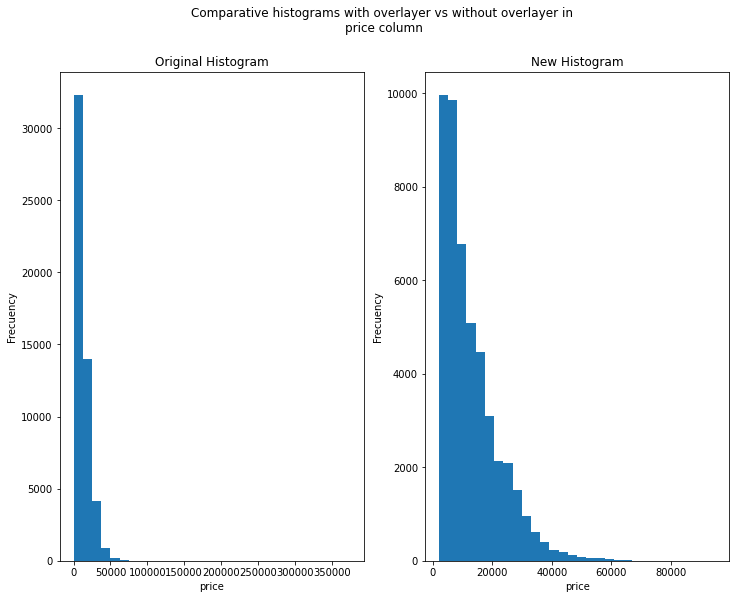

In [365]:
#Realización de histograma para columna Price
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,9))


ax1.hist(car_data['price'], bins = 30)
ax1.set_title('Original Histogram')
ax1.set_xlabel('price')
ax1.set_ylabel('Frecuency')


ax2.hist(new_car_data['price'],bins = 30)
ax2.set_title('New Histogram')
ax2.set_xlabel('price')
ax2.set_ylabel('Frecuency')

fig.suptitle('Comparative histograms with overlayer vs without overlayer in \nprice column')
plt.show()

En ambos casos observamos una tendencia a la baja conforme el precio aumenta, también observamos una mejor uniformidad, nuestros pico de valor está en el intervalo de precio de  3000 a 5000

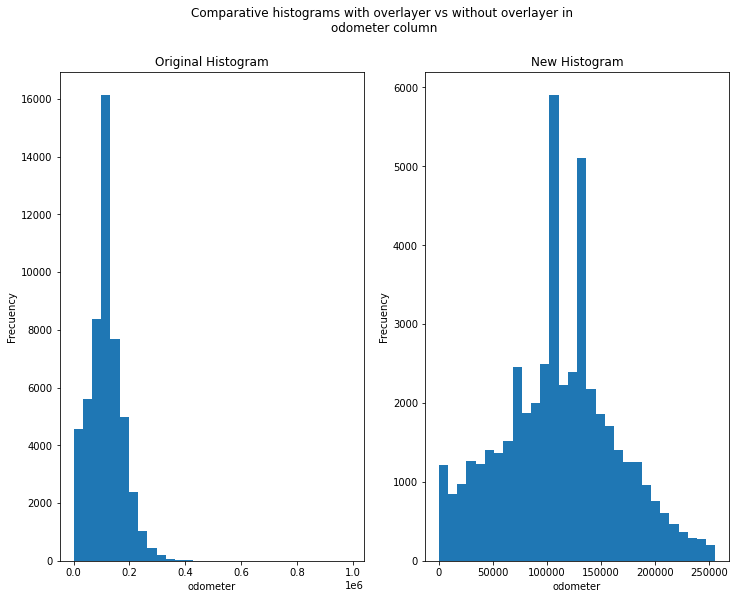

In [366]:
#Realización de histograma para columna odometer
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,9))


ax1.hist(car_data['odometer'], bins = 30)
ax1.set_title('Original Histogram')
ax1.set_xlabel('odometer')
ax1.set_ylabel('Frecuency')


ax2.hist(new_car_data['odometer'],bins = 30)
ax2.set_title('New Histogram')
ax2.set_xlabel('odometer')
ax2.set_ylabel('Frecuency')

fig.suptitle('Comparative histograms with overlayer vs without overlayer in \nodometer column')
plt.show()

Para nuestra columna de odometer nuestras gráficas han cambiado en uniformida, observamos que nuestros datos están más centrados teniendo dos picos uno apraximadamente en el valor de 115,000 que es el más largo y el otroen los 140,000 aproximadamente  

## Periodo de colocación de los anuncios<a id = 'periodo'></a>


Veamos la media y mediana de días de publicación, observemos un histograma para ver su distribución y determinar tiempos largos y tiempos cortos, utilizaremos nuestro metodo describe para ver nuestro valor mínimo y máximo

In [367]:
#Calculo de la media y mediana
days_mean, days_median = new_car_data['days_listed'].agg(['mean','median'])

print(f'Media de días publicados: {days_mean} \nMediana de días publicados: {days_median}')


Media de días publicados: 39.61365014955343 
Mediana de días publicados: 33.0


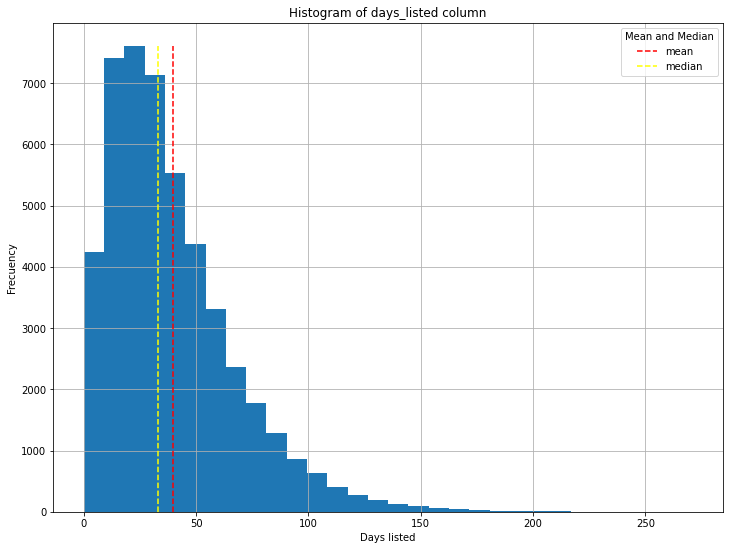

In [368]:
#Diagrama de caja para los días listados

new_car_data.hist(column = 'days_listed',bins = 30,figsize=(12,9))
plt.xlabel('Days listed')
plt.ylabel('Frecuency')
plt.title('Histogram of days_listed column')
plt.vlines(x=days_mean, ymin = 0, ymax = 7600,color='red', label= 'mean', linestyles = 'dashed') #dibujamos nuestra media
plt.vlines(x=days_median, ymin = 0, ymax = 7600,color='yellow', label= 'median', linestyles = 'dashed') #dibujamos nuestra mediana 
plt.legend(title = 'Mean and Median')
plt.show()


In [369]:
#Aplicación del método describe
new_car_data['days_listed'].describe(percentiles = [.10,.20,.30,.40,.50,.60,.70,.80,.90,.95,.99])

count    47809.000000
mean        39.613650
std         28.257694
min          0.000000
10%         10.000000
20%         16.000000
30%         22.000000
40%         27.000000
50%         33.000000
60%         40.000000
70%         48.000000
80%         60.000000
90%         78.000000
95%         94.000000
99%        132.000000
max        271.000000
Name: days_listed, dtype: float64

### Conclusión<a id='conclusion_4'></a>

Nuestro histograma nos muestra una tendencia decreciente a medida de que los días pasan de la publicación, tenemos un pico entre 20 a 25 días con otros picos cercanos a el, en donde justo uno de ellos coincide con nuestra mediana, tenemos valores de días posteados largos y con poca frecuencia, viendo nuestro resultado del método describe y visualizando en el histograma podemos concluir:

* Los tiempos cortos de ventas son aquellos ménores a 10 días
* Los tiempos demasiados largos de ventas son aquellos que están más de 100 días publicados 

## Precio promedio por cada tipo de vehículo <a id='precio_car'></a>

Verificaremos la relación entre el número de anuncios y el precio promedio por cada tipo de vehículo, en una pivot table buscaremos el valor del promedio y la cantidad de pulicaciones por tipo, las ordenaremos de forma descendente y tomaremos los dos tipos com mayor anuncios

In [370]:
#Creación del pivot_table
mean_price_type = (car_data
 .pivot_table(index = 'type', values = 'price', aggfunc = ['mean','count'])
 .sort_values(by=('count','price'),ascending = False)
)

mean_price_type.columns = ['price_mean','post']
mean_price_type.reset_index(inplace= True)

mean_price_type


,type,price_mean,post
0,SUV,11149.400000,12405
1,truck,16734.894924,12353
2,sedan,6965.358647,12154
3,pickup,16057.410418,6988
4,coupe,14353.442901,2303
5,wagon,9088.134328,1541
6,mini-van,8193.177433,1161
7,hatchback,6868.513849,1047
8,van,10546.941548,633
9,convertible,14575.881166,446


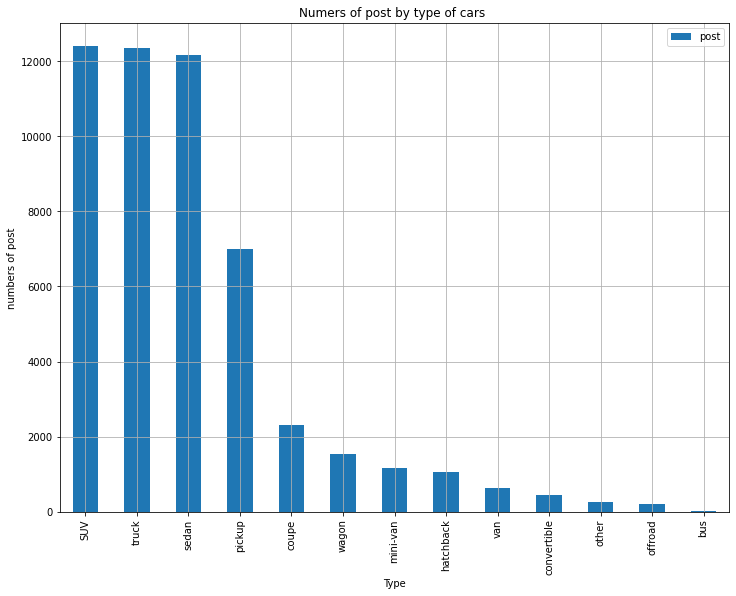

In [371]:
#Gráfico de barras para ver la relación entre 

mean_price_type.plot( x= 'type',y = 'post', kind = 'bar', grid = True, figsize= (12,9))
plt.title('Numers of post by type of cars ')
plt.ylabel('numbers of post')
plt.xlabel('Type')
plt.show()

### Conclusión<a id='conclusion_4'></a>

Tenemos un total de 13 tipos de vehículos dentro de los cuales Los tipos con más publicaciones son las **suv** y las **truck**

## Factores de precio <a id= 'factores'></a>

En este apartado haremos diagramas de correlación y diagramas de bigote entre nuestros factores de interes y de nuestras dos publicaciones más populares obtenidas en la sección anterior para detectar cual tiene mayor influencia en el precio del vehículo

Aplicaremos una matriz de correlación de nuestro precio entre las variables cuantitativas:
- precio  (columna `price`)
- millaje (columna `odometer`)
- condition (columna `condition`)
- años del vehículo (columna `car_ years`)

Aplicaremos un diagramas de bigotes respecto al precio de nuestra variables categóricas:
- Color (columna `paint_color`)
- Tipo de transmisión  (columna `transmition`)

### Verificación de factores para vehículos tipo SUV<a id='truck'></a>

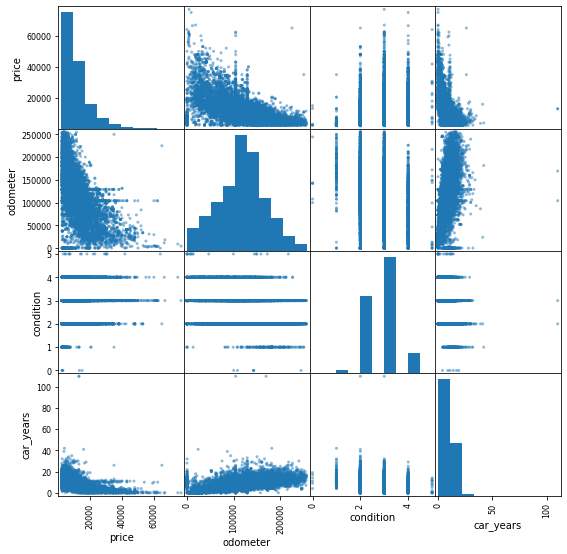

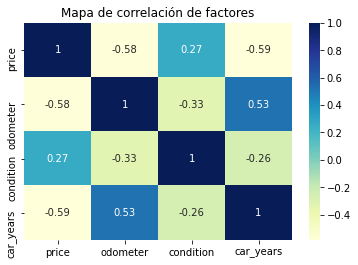

In [375]:
#Grafica de matriz de correlación entre nuestros factores de interes
x = new_car_data[new_car_data['type'] == 'SUV'][['price','odometer','condition','car_years']]
pd.plotting.scatter_matrix(x,figsize = (9,9), grid = True)
plt.show()

#Impresión de valroes de correlación

sb.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.title('Mapa de correlación de factores')
plt.show()

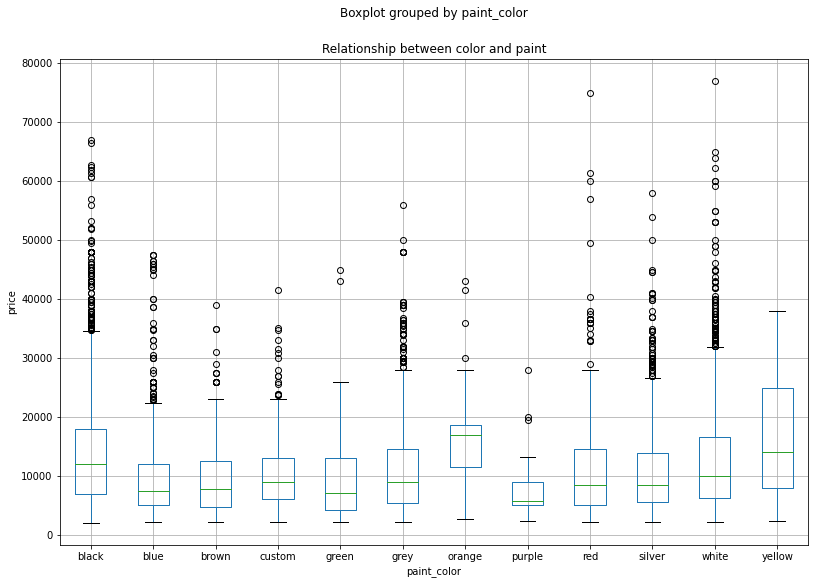

In [315]:
#Diagrama de caja por color
new_car_data[new_car_data['type'] == 'SUV'].boxplot(column = 'price' , by = 'paint_color', figsize = (13,9))
plt.title('Relationship between color and paint')
plt.ylabel('price')
plt.show()

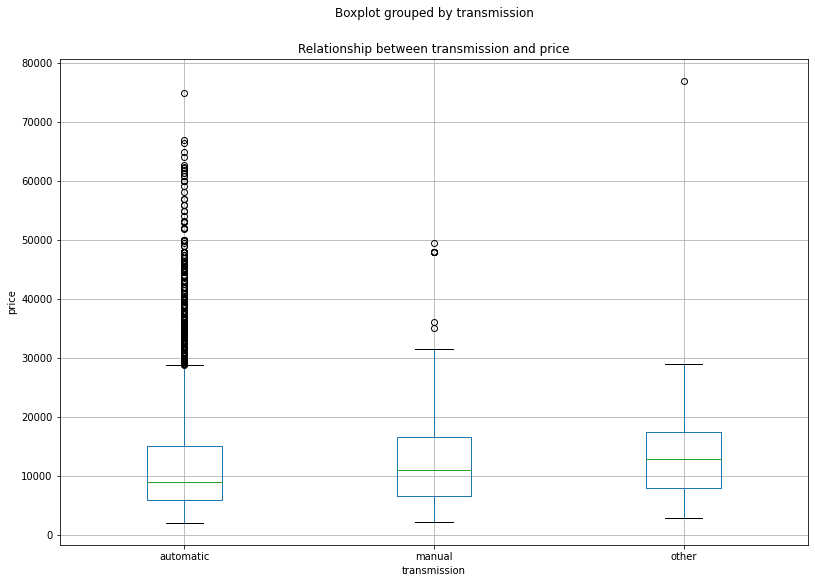

In [316]:
#Diagrama de caja por transmisión
new_car_data[new_car_data['type']  == 'SUV'].boxplot(column = 'price' , by = 'transmission', figsize = (13,9))
plt.title('Relationship between transmission and price')
plt.ylabel('price')
plt.show()

### Conclusión intermedia <a id = conclusion_int_1></a>

Para las camionetas tipo SUV vemos que hay una correlación del precio de más del 50% con los años de vida del vehículo y el millaje, en cuanto a los colores vemos el color amarillo en este caso tiende a tener mayores precios y por el tipo de transimisión están la mayoria por debajo de los 30,000

### Verificación de factores para vehículos tipo truck<a id='truck'></a>

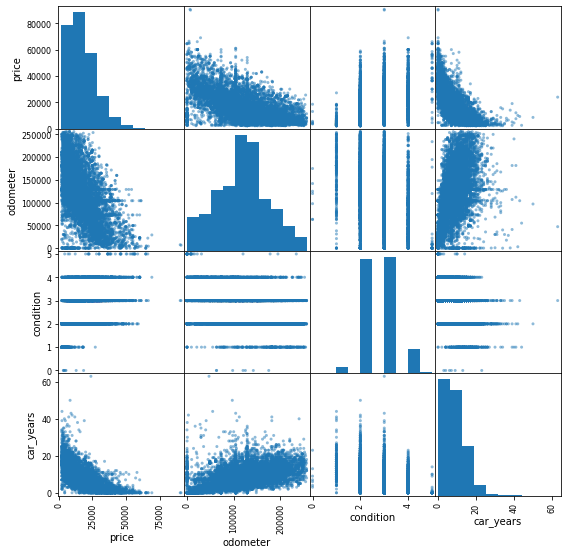

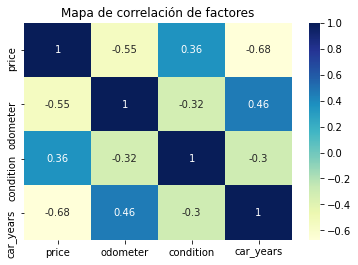

In [379]:
x = new_car_data[new_car_data['type'] == 'truck'][['price','odometer','condition','car_years']]
pd.plotting.scatter_matrix(x,figsize = (9,9), grid = True)
plt.show()

#Impresión de valroes de correlación
sb.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.title('Mapa de correlación de factores')
plt.show()

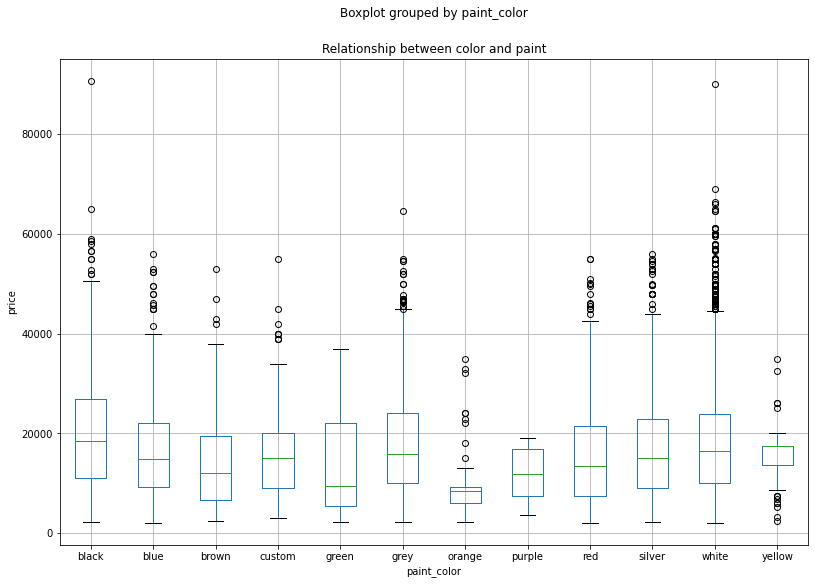

In [318]:
#Diagrama de caja por color
new_car_data[new_car_data['type'] == 'truck'].boxplot(column = 'price' , by = 'paint_color', figsize = (13,9))
plt.title('Relationship between color and paint')
plt.ylabel('price')
plt.show()

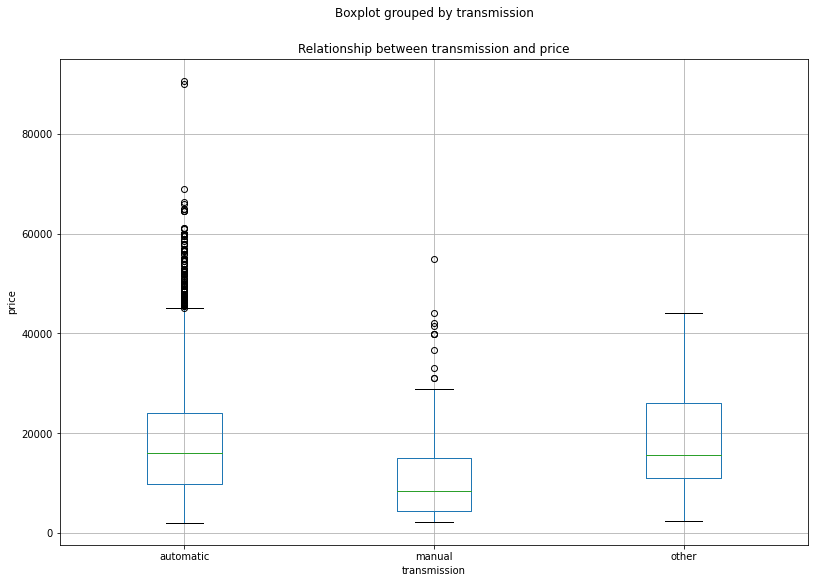

In [319]:
#Diagrama de caja por transmisión
new_car_data[new_car_data['type'] == 'truck'].boxplot(column = 'price' , by = 'transmission', figsize = (13,9))
plt.title('Relationship between transmission and price')
plt.ylabel('price')
plt.show()

### Conclusión intermedia <a id = conclusion_int_2></a>

Para las camionetas tipo truck vemos que hay una correlación del precio de más del 50% con los años de vida del vehículo y el millaje, incluso teniendo más relación en los años de vida comparado con las SUV, en cuanto a los colores vemos que aquí el color negro tiende a tener mayores precios y por el tipo de transimisión están el tipo automatico gana

### Conclusión <a id = 'conclusion_6'></a>

Podemos observar en nuestros dos tipos de autos que hay una mayor relación en los parametros de años de vida del vehículo y los millajes, observamos que en tanto a los colores y tipo de transmisión difieren.

## Conclusión general <a id=final_conclusion></a>


Nuestra tabla contaba con multiples detalles que podríamos resumir de la siguiente manera:

- **Valores núlos**: contabamos con 5 columnas que contaban con estos valores nuestras columnas `odometer`, `model_year`, `cylinders`, `paint_color` e `is_4wd` para las primera se agrupó con la columna `condition` y se optó por tomar la mediana ya que se observó que contaba con valores atípicos por lo que el uso de la media sería incorrecto. 
Para las siguientes dos columnas lo agrupamos con la columna `model` para determinar su mediana y cambiar los valores asuentes.
Para nuestra columna `paint_color` agrupamos los modelos por color y con el método describe() obtuvimos las modas, ya que al ser un valor cualitativo no podemos obtener su media o mediana. Finalmente nuestra columna `is_4wd` observamos que se trataban de valores binarios por lo que los valores ausentes se cambiaron por el valor 0

- **Valores** con tipos equivocados: se corrigienron cambiando nuestras columnas  `is_4wd` la cambiamos  a tipo bool, `model_year` a un tipo entero de 16 bits, `odometer` a un tipo entero de 32 bits por tener valores más grandes y finalmente la columna `date_posted` a un tipo datetime

Mediante el uso de gráficas de histogramas visualizamos los factores de

- **Precio**: Observamos que nuestra frecuencia va disminuyendo conforme se aumenta los precios teníamos algunos preciós mayores a 300,000 lo cual disparaba nuestra media.

- **Los años del vehículo cuando el anuncio se colocó**: Observamos que tenemos una mayor frecuencia en donde los autos están entre 5 a 10 años aproximadamente para después bajar nuestra frecuencia conforme pasan los años

- **Millaje**: Observamos un pico que dividía nuestra grafica en dos a la izquierda crecía mientras a la derecha disminuía

- **Número de cilindros:** Encontramos que la mayor cantidad de publicaciones eran para autos de 8 cilindros

- **Estado**: Encontramos que la mayor cantidad de publicaciones eran para autos de excelente condición


Una vez hechas estas observaciones utilizamos nuestra columnas de precio y millaje y encontramos limites inferiores y superiores para determinar el rango que se consideraría estarían los valores atípicos.
Se creo una nueva tabla sin estos valores para comparar nuestros datos anteriores, observando que nuestros tabla de precio no varío en forma y nuestra tabla de millaje si cambió un poco

**¿Qué factores impactan más sobre el precio?**

Para responder esta pregunta obtuvimos dos tipos de autos con más publicaciones y realizamos diagramas de correlación y diagramas de bigote obteniendo como resultado que el factores que más impactan son:
- Los años del vehículo
- Millage